In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Tai_lieu_dai_hoc\\do an\\customer segmentation\\wholesale+customers\\Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
print(df.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [6]:
# Inspect the dataset
print(df.index.is_unique)
print(df.columns.is_unique)
print(df[df.duplicated() == True])

True
True
Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


In [7]:
list_=['Channel','Region']
for i in list_:
    print("Column "+ i + ' unique values: ')
    print(df[i].unique())
    print("\n")

Column Channel unique values: 
[2 1]


Column Region unique values: 
[3 1 2]




In [8]:
df = df.drop(list_, axis = 1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [9]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
def plot_histogram_and_boxplot(column):
    # Vẽ histogram
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    n, bins, patches = axs[0].hist(x=column, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)

    for i in range(len(patches)):
        height = int(patches[i].get_height())
        if height > 0:
            axs[0].text(patches[i].get_x() + patches[i].get_width() / 2, height,
                     str(height), ha='center', va='bottom')

    spines = ['top', 'right']
    for s in spines:
        axs[0].spines[s].set_visible(False)

    axs[0].tick_params(left=False, bottom=False)

    axs[0].set_title(f'Histogram of {column.name}', fontweight='bold', size=14, loc='left')
    axs[0].set_xlabel('Spending ($)', size=12)
    axs[0].set_ylabel('Customer', size=12)

    # Vẽ box plot
    axs[1].boxplot(column)

    for i, box in enumerate(axs[1].artists):
        axs[1].text(box.get_x() + box.get_width() / 2, column.iloc[i],
                 str(int(column.iloc[i])), ha='center', va='bottom')

    spines = ['top', 'right']
    for s in spines:
        axs[1].spines[s].set_visible(False)

    axs[1].tick_params(left=False, bottom=False)

    axs[1].set_title(f'Box Plot of {column.name}', fontweight='bold', size=14, loc='left')

    # Hiển thị tên của bạn dưới cùng bên trái của toàn bộ đồ thị
    fig.text(0.125, 0.01, "Phan Lac An - 20206109", style='italic')

    plt.show()

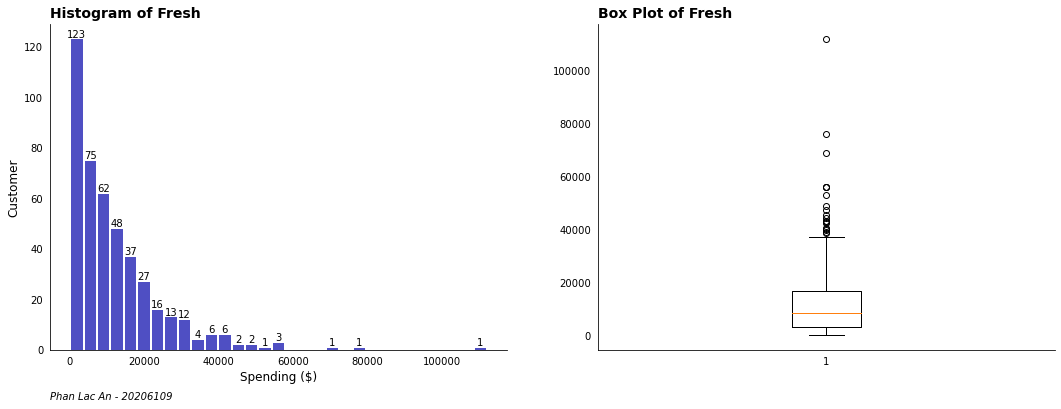

In [11]:
plot_histogram_and_boxplot(df['Fresh'])

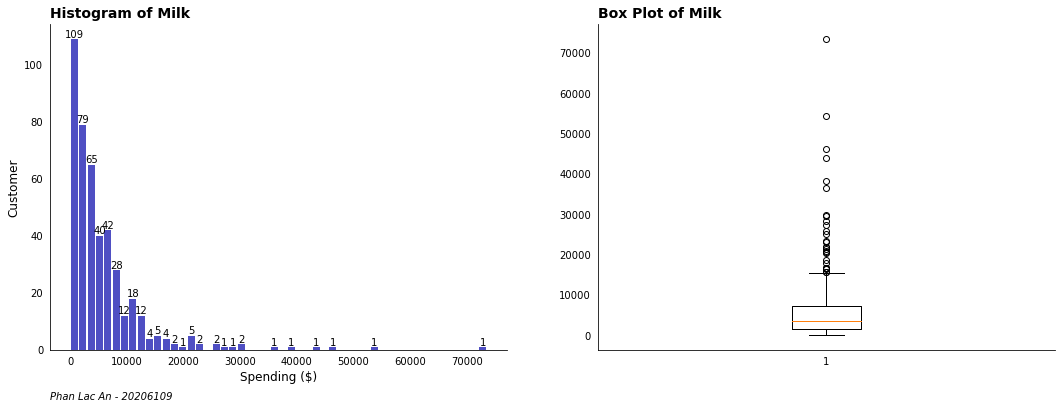

In [12]:
plot_histogram_and_boxplot(df['Milk'])

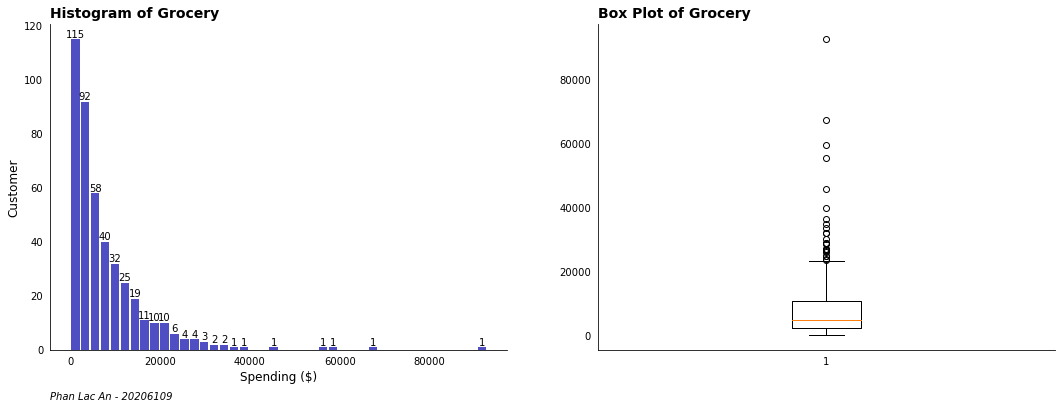

In [13]:
plot_histogram_and_boxplot(df['Grocery'])

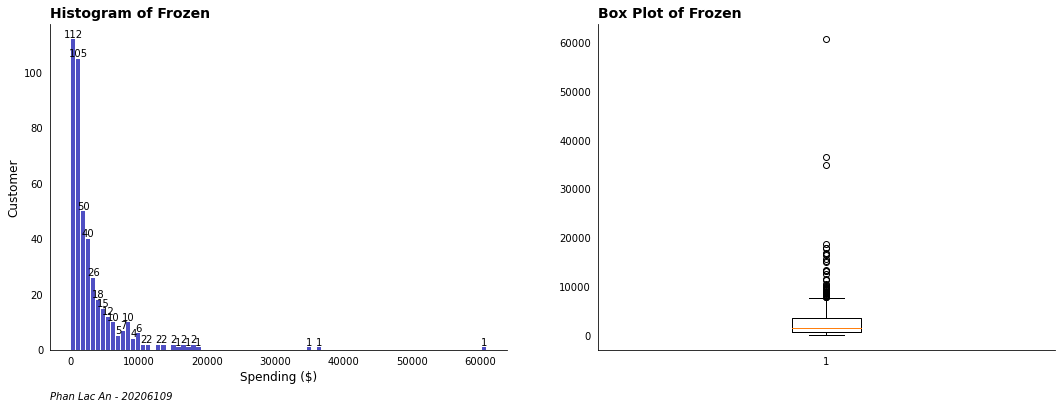

In [14]:
plot_histogram_and_boxplot(df['Frozen'])

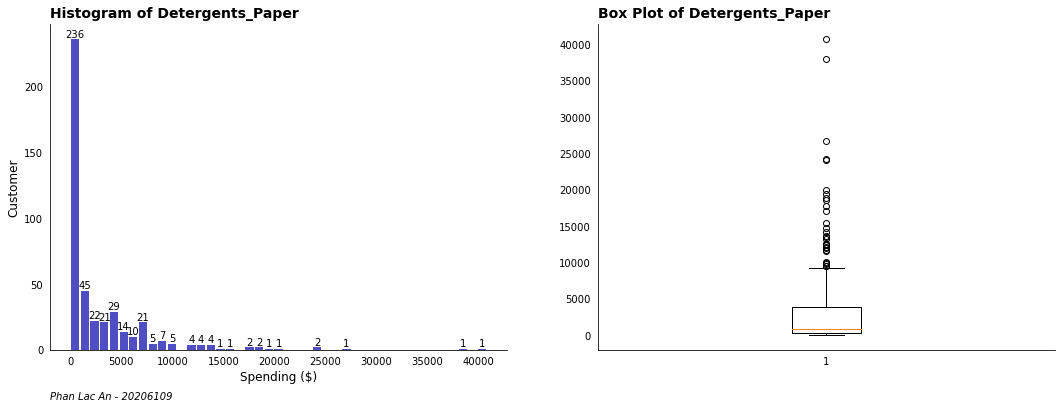

In [15]:
plot_histogram_and_boxplot(df['Detergents_Paper'])

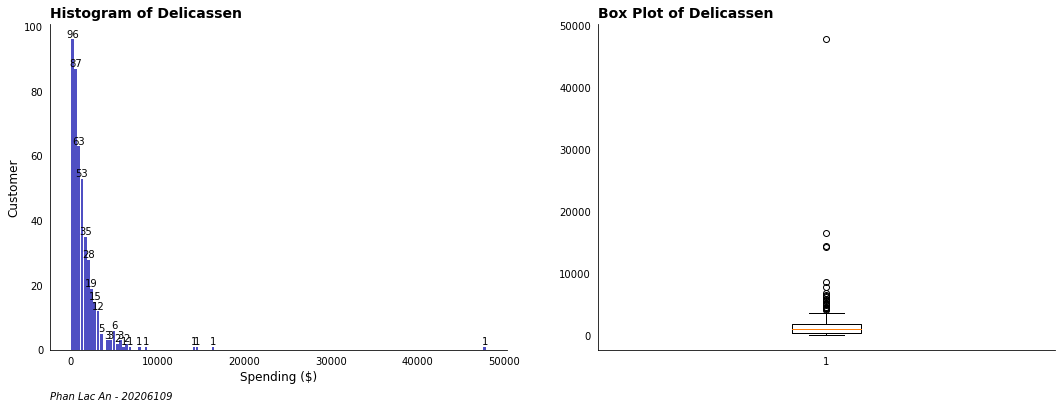

In [16]:
plot_histogram_and_boxplot(df['Delicassen'])

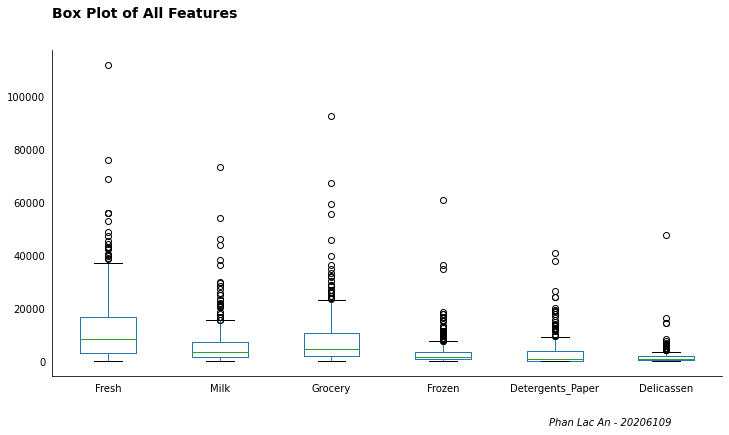

In [17]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Tạo box plot cho toàn bộ các cột trong bộ dữ liệu
df.boxplot(ax=ax)

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Bỏ tích trên các trục
ax.tick_params(left=False, bottom=False)

# Bỏ grid lines
ax.grid(False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of All Features', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic', transform=plt.gcf().transFigure)

# Show biểu đồ
plt.show()

Có thể thấy dữ liệu có tương đối nhiều outlier, khoảng 40 outlier

In [18]:
# pd.plotting.scatter_matrix(df, alpha=0.3,figsize=(15,8),diagonal='kde' )
# plt.tight_layout() # To avoid overlapping of plots

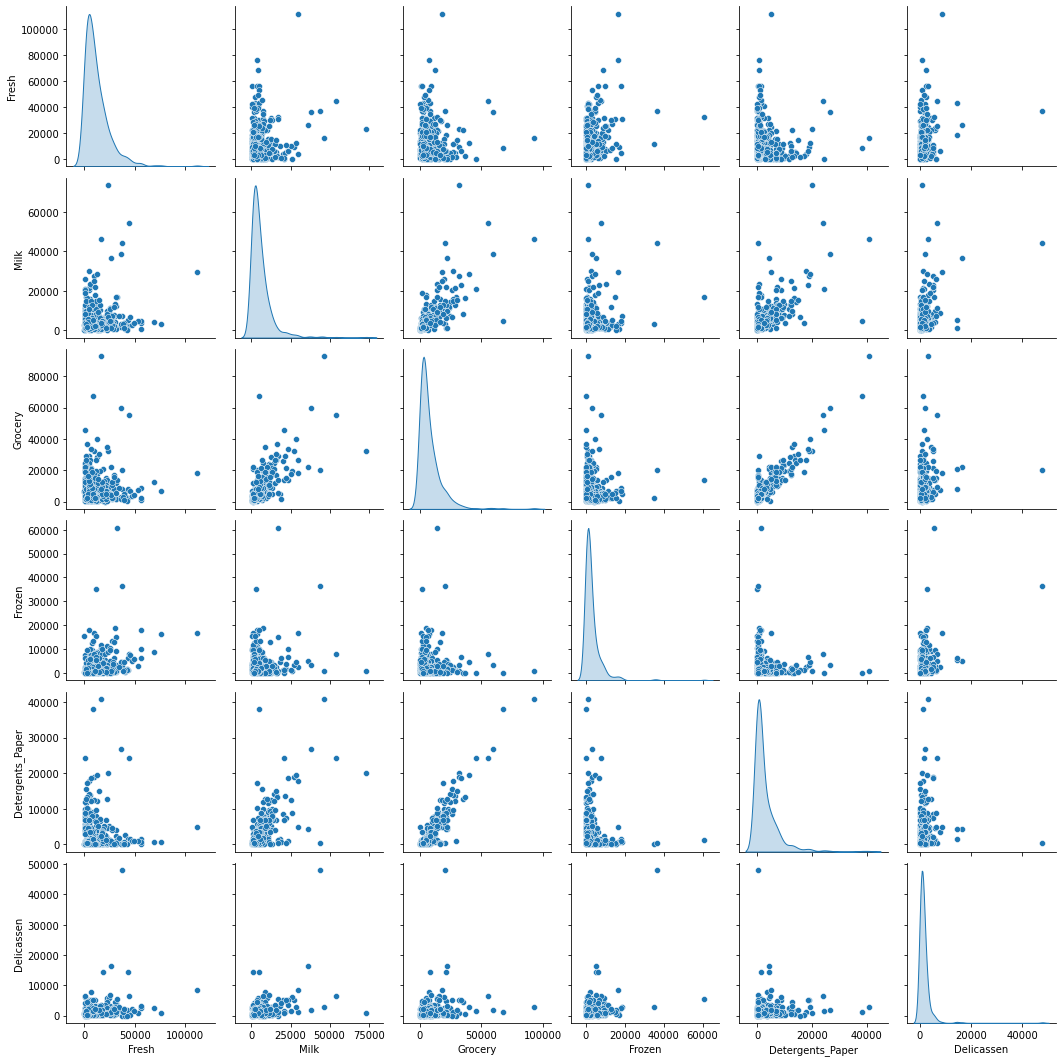

In [19]:
sns.pairplot(df, diag_kind='kde')

plt.show()

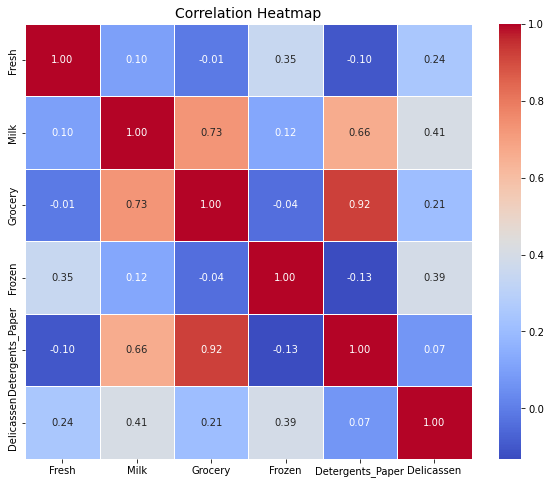

In [20]:
# Tính ma trận tương quan của DataFrame
correlation_matrix = df.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

## Tiền xử lý

Chúng ta tiến hành đưa set các giá trị outlier thành giá trị max hoặc min

In [21]:
def handle_outliers(dataframe, column_name):
    # Xác định giá trị cực tiểu và cực đại của Box plot
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Clip các điểm ngoại lệ về giá trị cực tiểu và cực đại
    dataframe[column_name] = np.clip(dataframe[column_name], lower_bound, upper_bound)

    return dataframe

In [22]:
df_handle_outliers = df
for column in df_handle_outliers.columns:
    handle_outliers(df_handle_outliers, column)

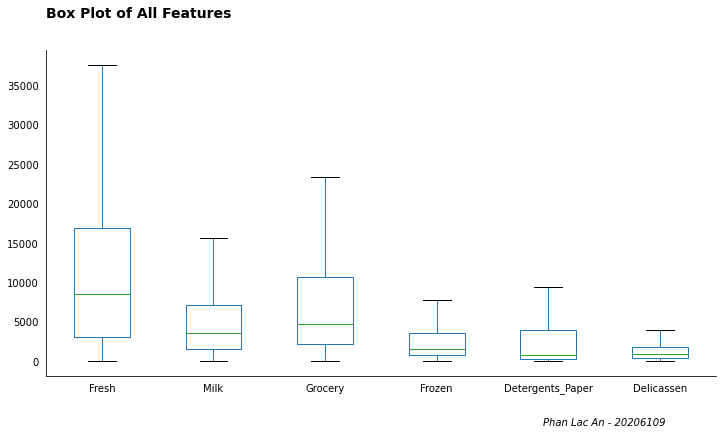

In [23]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Tạo box plot cho toàn bộ các cột trong bộ dữ liệu
df.boxplot(ax=ax)

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Bỏ tích trên các trục
ax.tick_params(left=False, bottom=False)

# Bỏ grid lines
ax.grid(False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of All Features', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic', transform=plt.gcf().transFigure)

# Show biểu đồ
plt.show()

In [24]:
# from collections import Counter
# # For each feature find the data points with extreme high or low values
# outliers_tally = Counter()
# for feature in df.keys():

#     # Calculate Q1, and Q3 (25th, and 75th percentiles) for the given feature
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)

#     # Use the IQR to calculate an outlier boundary
#     step = 1.5 * (Q3 - Q1)

#     # Get the outliers for this feature
#     new_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]

#     # Add these outlier indices to the set of all outlier indices
#     outliers_tally.update(new_outliers.index)

# # Separate the outliers
# outlier_indices = outliers_tally.keys()
# outliers_df = df.loc[outlier_indices]

# # Show the outliers
# display(outliers_df)

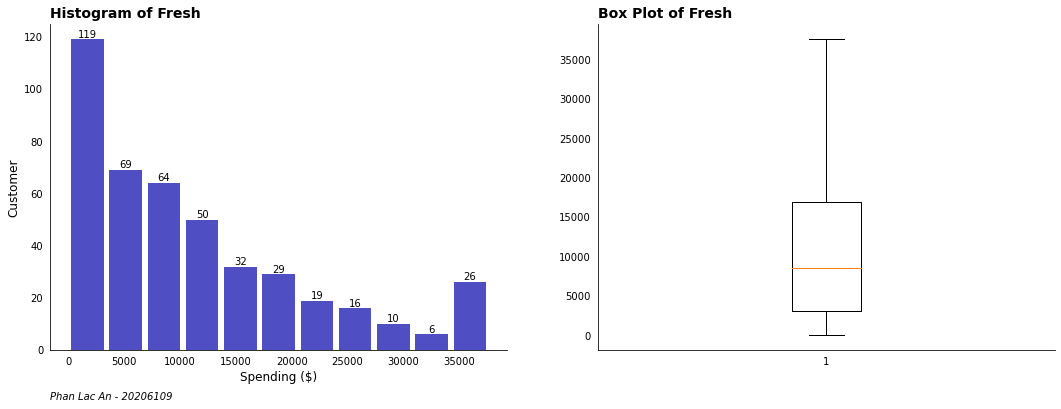

In [25]:
plot_histogram_and_boxplot(df['Fresh'])

In [26]:
# Scale the data using the natural log
good_data = np.log(df_handle_outliers)

In [27]:
good_data 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.278492
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.278492
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,8.958315,5.204007,7.698029
436,10.535896,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.060913,6.079933,9.150577,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


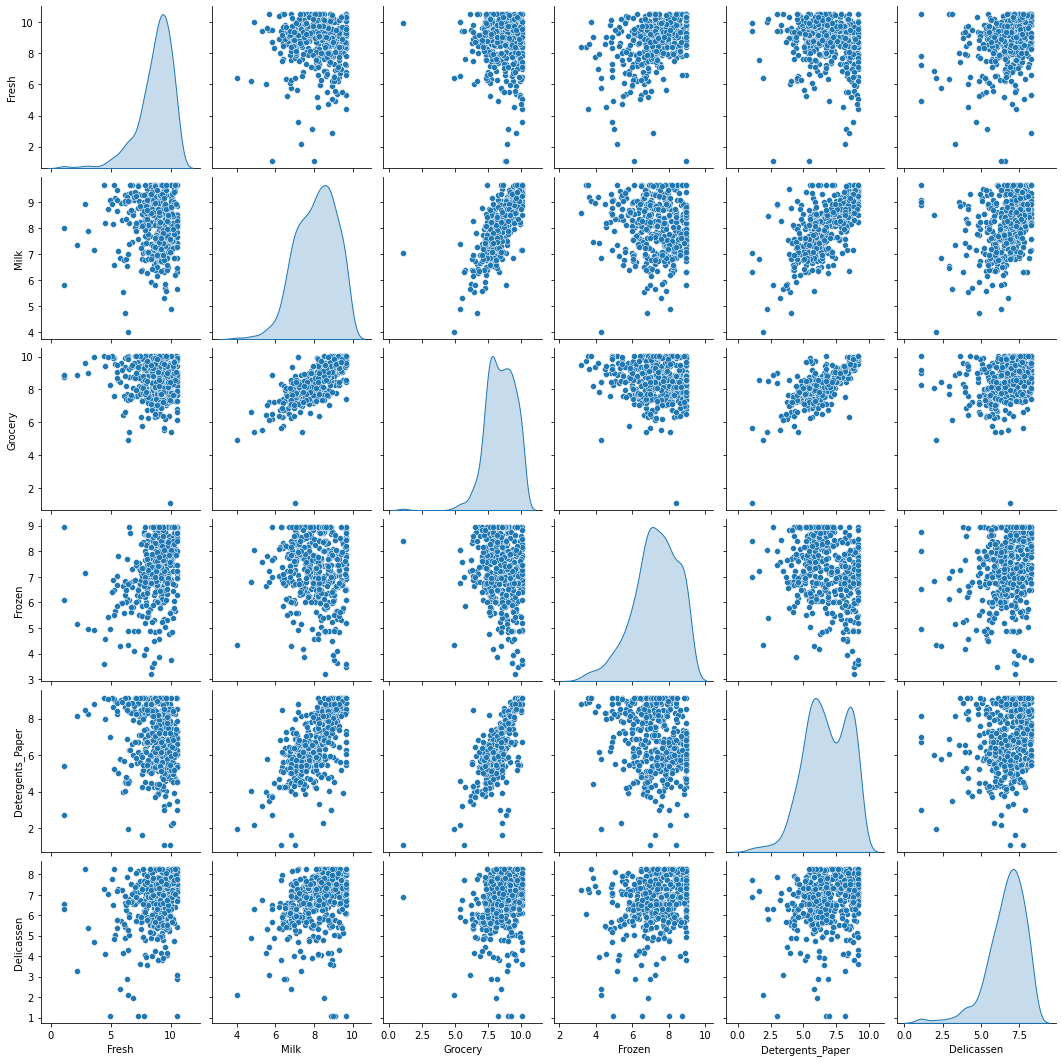

In [28]:
sns.pairplot(good_data, diag_kind='kde')

plt.show()

In [29]:
from sklearn.decomposition import PCA

# Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit_transform(good_data)

array([[-1.76600753, -0.28722246, -0.73864588, -1.79308769,  0.21004684,
         0.40398508],
       [-1.80037022, -0.98457521,  0.26138487,  0.06445475,  0.14215023,
         0.25028508],
       [-1.77548815, -1.41413872,  0.96036361,  0.00932234, -0.20292378,
         0.35125068],
       ...,
       [-3.2771277 , -1.153299  , -0.73506994, -1.07705713,  0.20394335,
        -0.01957481],
       [ 1.64457937, -0.46125985,  0.72339336, -1.17466692,  0.1014677 ,
        -0.05700083],
       [ 0.56201582,  3.47804274, -2.01559613, -1.39251337,  0.15095377,
         0.12598011]])

In [30]:
# The variance explained by each principal component
explained_variances = pca.explained_variance_ratio_

print("Proportion of the variance explained by each dimension")
print("\n".join(["{}: {:1.3f}".format(i+1,val) for i,val in enumerate(explained_variances)]))

# Total Variance explained by the nth principal components
cumulative_variance = [explained_variances[:i+1].sum() for i in range(len(explained_variances))]
print("\nTotal variance explained by the first N principal compoments")
print("\n".join(["{}: {:1.3f}".format(i+1,val) for i,val in enumerate(cumulative_variance)]))

Proportion of the variance explained by each dimension
1: 0.441
2: 0.273
3: 0.117
4: 0.097
5: 0.047
6: 0.024

Total variance explained by the first N principal compoments
1: 0.441
2: 0.714
3: 0.832
4: 0.929
5: 0.976
6: 1.000


Dựa trên tổng phương sai giải thích này, ta có thể nhận thấy rằng để đạt được ít nhất 80% phương sai giải thích, ta cần giữ lại ít nhất 3 thành phần chính.

Vì vậy, số lượng thành phần chính tối ưu trong trường hợp này có thể là 3.

In [31]:
# Fit PCA to the good data using only two dimensions
pca = PCA(n_components=3)
pca.fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

In [32]:
reduced_data

,Dimension 1,Dimension 2,Dimension 3
0,-1.766008,-0.287222,-0.738646
1,-1.800370,-0.984575,0.261385
2,-1.775488,-1.414139,0.960364
3,1.138928,-1.431445,0.583004
4,-0.696047,-2.393330,0.435542
...,...,...,...
435,0.595452,-2.603048,0.510276
436,3.222747,-1.891748,0.504780
437,-3.277128,-1.153299,-0.735070
438,1.644579,-0.461260,0.723393


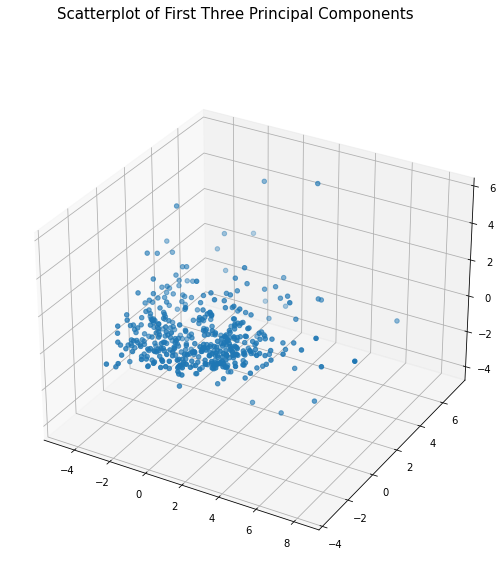

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Tạo subplot 3D
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111, projection='3d')

fig.suptitle('Scatterplot of First Three Principal Components', fontsize=15)
img = ax.scatter(reduced_data["Dimension 1"], reduced_data["Dimension 2"], reduced_data["Dimension 3"])

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(reduced_data)
    score = silhouette_score(reduced_data, kmeans.labels_)
    silhouette_coefficients.append(score)

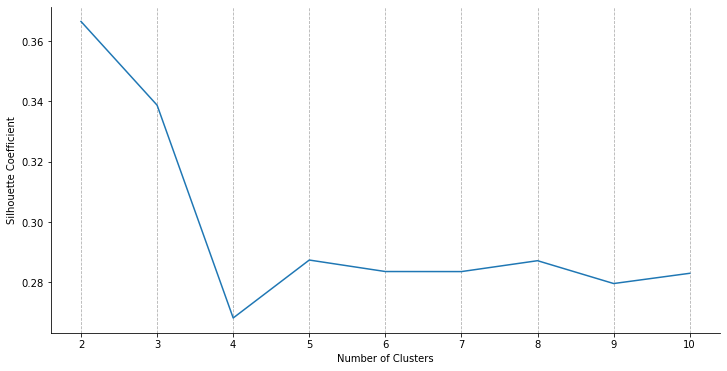

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(2, 11), silhouette_coefficients)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(2, 11))

plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [37]:
# Tính hệ số hình chiếu trug bình cho số lượng cụm được chọn
score = {}
from sklearn.metrics import silhouette_score
for n in range(10, 1, -1):
    clusterer = KMeans(n_clusters=n, random_state=0).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    score_n = silhouette_score(reduced_data, preds, metric='euclidean')
    print ('Điểm Silhouette cho {} clusters: {}'.format(n, score_n))
    score[n] = silhouette_score(reduced_data, preds, metric='euclidean')

Điểm Silhouette cho 10 clusters: 0.283610540912461
Điểm Silhouette cho 9 clusters: 0.2833966725350184
Điểm Silhouette cho 8 clusters: 0.28216272656637786
Điểm Silhouette cho 7 clusters: 0.29486955089142414
Điểm Silhouette cho 6 clusters: 0.2863710258737783
Điểm Silhouette cho 5 clusters: 0.2850642456007912
Điểm Silhouette cho 4 clusters: 0.2678661294814912
Điểm Silhouette cho 3 clusters: 0.33889432104869416
Điểm Silhouette cho 2 clusters: 0.3665211233453859


Lựa chọn K = 2 là tối ưu nhất

In [38]:
kmeans = KMeans(n_clusters=2,**kmeans_kwargs)
kmeans.fit(reduced_data)

KMeans(init='random', n_clusters=2, random_state=42)

In [39]:
# Dự đoán cụm cho mỗi điểm dữ liệu
preds = kmeans.predict(reduced_data)

# Tìm các trung tâm cụm 
centers = kmeans.cluster_centers_

# Dự đoán cụm cho mỗi điểm dữ liệu đã biến đổi
preds = kmeans.predict(reduced_data)
centers = kmeans.cluster_centers_

In [40]:
def cluster_viz(reduced_data, labels, title="", legend_labels=["Segment 1","Segment 2"]):
    '''
    Visualizes the PCA-reduced cluster data in three dimensions.
    '''
    # Tạo subplot 3D
    fig = plt.figure(figsize=(18, 9))
    ax = fig.add_subplot(111, projection='3d')

    PALLETTE =  ["#FF8000", "#5BA1CF"]
    colors = [PALLETTE[y] for y in labels]

    classes = np.unique(labels)
    for class_id in classes:
        ax.scatter(reduced_data.loc[labels==class_id, "Dimension 1"],
                   reduced_data.loc[labels==class_id, "Dimension 2"],
                   reduced_data.loc[labels==class_id, "Dimension 3"],
                   label=legend_labels[class_id],
                   c=PALLETTE[class_id], s=100, alpha=0.4, linewidths=0)


    ax.legend(loc="lower right", frameon=False)

    # Set plot title
    ax.set_title(title)

    plt.show()

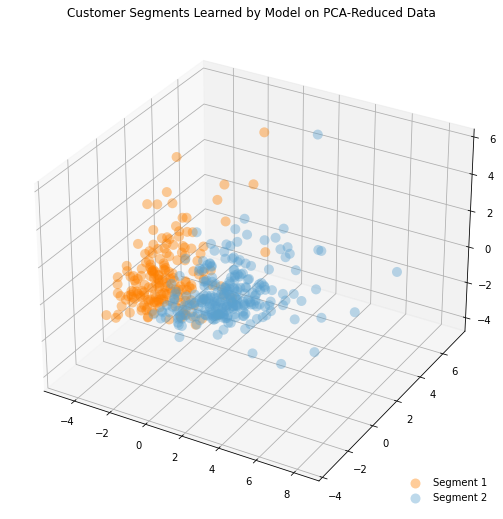

In [41]:
cluster_viz(reduced_data,
            labels=preds,
            title="Customer Segments Learned by Model on PCA-Reduced Data")

In [42]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers (inverse of log transformation)
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3850.0,7128.0,11629.0,888.0,4164.0,865.0
Segment 1,8491.0,1873.0,2325.0,1989.0,278.0,694.0


Bảng trên cho thấy thói quen chi tiêu của khách hàng trung bình cho mỗi cụm trông như thế nào. Nhưng để hiểu rõ hơn về sự khác biệt của thói quen chi tiêu tương đối của họ, chúng ta có thể chuyển đổi các đơn vị chi tiêu thô thành z-scores, sẽ cho thấy mức độ sai lệch so với giá trị trung bình.

In [43]:
(true_centers - df.mean()) / df.std()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-0.735204,0.474060,0.665899,-0.672295,0.602349,-0.370904
Segment 1,-0.280718,-0.723967,-0.744539,-0.215125,-0.719063,-0.528789


segment 0 chi tiêu nhiều cho cho các sản phẩm sữa, đồ tạp hóa và chất tẩy rửa, điều đó cho thấy segment 0 có thể đại diện cho các cửa hàng tạp hóa nhỏ lẻ.

segment 1 chi tiêu đa số là dưới so với giá trị trung bình, tuy nhiên z-score của mặt hàng đông lạnh của nhóm này là cao nhất và chi tiêu cho đồ tươi sống cũng khá là lớn. Do đó đây có thể đại diện cho các nhà hàng.